# <b> <span style = "font-size: 3 em;"> Contents </b> <a name = 'Home'></a>

* [Problem description](#1)
* [Data discription](#2)
* [Loading dataset and importing modules](#3)
* [Data summary](#4)
* [Data preprocessing](#5)
* [Dependent variables analysis](#6)
* [Model building](#7)
* [Conclusion](#8)
* [Empirical implications](#9)

# I. PROBLEM DESCRIPTION <a name = '1'></a>

Currently, many big communities have introduced rental bikes to improve transportation comfort. It is critical to have the rental bike ready and accessible to the public at the appropriate moment, as this reduces waiting time. Eventually, delivering a steady supply of rental bikes to the city becomes a serious challenge. The critical component is predicting the number of bikes needed at each hour to ensure a steady supply of rental bikes.

# II. DATA DESCRIPTION <a name = '2'></a>

The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.
### <b>Attribute Information </b>

* Date: The date of the day, from 01/12/2017 to 30/11/2018, formating in DD/MM/YYYY
* Rented Bike count: Dependant variable, number of rented bikes per hour
* Hour: The hour of the day, starting from 0-23
* Temperature: Temperature in Celsius
* Humidity: Humidity in the air in %
* Windspeed: Speed of the wind in m/s
* Visibility: Visibility in m
* Dew point temperature: Temperature at which relative humidity reaches 100%
* Solar radiation - MJ/m2
* Rainfall: Amount of rain in mm
* Snowfall: Amount of snow in cm
* Seasons: Season of the year including Winter, Spring, Summer, Autumn
* Holiday: If the day is holiday period or not
* Functional Day: If the renting company is operating or not

# III. LOADING DATASET AND IMPORTING MODULES <a name='3'></a>

## 1. Import modules

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime as datetime
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.linear_model import LassoCV, Ridge
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import cross_validate, train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

## 2. Import data

In [46]:
df=pd.read_excel(r'https://github.com/Thuydung262412/Project-git/blob/483455eaa3f06e23f0a184ecb3f382a3c8d1584f/DATASET.xlsx?raw=true')
df.head()

,Date,Rented Bike Count,Hour,Temperature( C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature( C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-01-12 00:00:00,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-01-12 00:00:00,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-01-12 00:00:00,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-01-12 00:00:00,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-01-12 00:00:00,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


#IV. DATA SUMMARY<a name='4'></a>

In [47]:
# Viewing the data of top 5 rows
df.head()

,Date,Rented Bike Count,Hour,Temperature( C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature( C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-01-12 00:00:00,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-01-12 00:00:00,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-01-12 00:00:00,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-01-12 00:00:00,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-01-12 00:00:00,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [4]:
# Getting the number of rows and columns of the dataset
df.shape

(8760, 14)

- Dataset includes 14 columns and 8760 rows




In [48]:
# Getting all the columns:
print('Features of dataset:', df.columns)

Features of dataset: Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature( C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature( C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')


In [6]:
# Getting information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature( C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature( C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [7]:
# count the unique value
df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature( C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature( C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

In [8]:
# Looking for the description of the dataset to get insights of the data
df.describe()

,Rented Bike Count,Hour,Temperature( C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature( C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


# V. DATA PREPROCESSING<a name='5'></a>

## Checking for null

In [ ]:
# check for count of missing values in each column
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature( C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature( C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

- The dataset has no null values

## Rename column name

In [49]:
# Rename the complex columns name
df=df.rename(columns={'Rented Bike Count':'Rented_Bike_Count',
                      'Temperature( C)':'Temperature',
                      'Humidity(%)':'Humidity',
                      'Wind speed (m/s)':'Wind_speed',
                      'Visibility (10m)':'Visibility',
                      'Dew point temperature( C)':'Dew_point_temperature',
                      'Solar Radiation (MJ/m2)':'Solar_Radiation',
                      'Rainfall(mm)':'Rainfall',
                      'Snowfall (cm)':'Snowfall',
                      'Functioning Day':'Functioning_Day'})

## Breaking Date into Day/Month/Year
- For Weekday=, 0=Monday and 6=Sunday

In [50]:
# Change the 'Date' column into three 'year' 'month', 'day' column
df['Date']=df['Date'].astype('datetime64[ns]')
df['year']=df['Date'].dt.year
df['month']=df['Date'].dt.month
df['day']=df['Date'].dt.day
df['weekday']=df['Date'].dt.weekday

## Change type to Categorical

In [51]:
cols=['Hour','day','month','year','weekday']
for col in cols:
  df[col]=df[col].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   8760 non-null   datetime64[ns]
 1   Rented_Bike_Count      8760 non-null   int64         
 2   Hour                   8760 non-null   category      
 3   Temperature            8760 non-null   float64       
 4   Humidity               8760 non-null   int64         
 5   Wind_speed             8760 non-null   float64       
 6   Visibility             8760 non-null   int64         
 7   Dew_point_temperature  8760 non-null   float64       
 8   Solar_Radiation        8760 non-null   float64       
 9   Rainfall               8760 non-null   float64       
 10  Snowfall               8760 non-null   float64       
 11  Seasons                8760 non-null   object        
 12  Holiday                8760 non-null   object        
 13  Fun

## Create Time of Day column
We divide the hour of the day into 4 periods:
*   night: from 00:00 to 06:00
*   morning: from 6:00 to 12:00
*   afternoon: from 12:00 to 18:00
*   evening: from 18:00 to 24:00 (00:00)





In [52]:
df['TimeofDay']=pd.cut(df['Hour'],
        bins=[0,6,12,18,24],
        labels=['night','morning','afternoon','evening'],
        right=False,
        include_lowest=True)
df.head()


,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,year,month,day,weekday,TimeofDay
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,3,night
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,3,night
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,3,night
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,3,night
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,3,night


## Create Weekend/ Weekday column
We will divide the days of the week into 2 types:
*   Weekday: From Monday to Friday
*   Weekend: Saturyday & Sunday




In [53]:
day=[]
for i in range(len(df['weekday'])):
  if df['weekday'][i]==5 or df['weekday'][i]==6:
    day.append('weekend')
  else:
    day.append('weekday')
df['day']=day
df.head()

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,year,month,day,weekday,TimeofDay
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,weekday,3,night
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,weekday,3,night
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,weekday,3,night
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,weekday,3,night
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,weekday,3,night


# VI. Variable Analysis<a name='6'></a>

## 1. Univariate analysis

### Abnormality detection

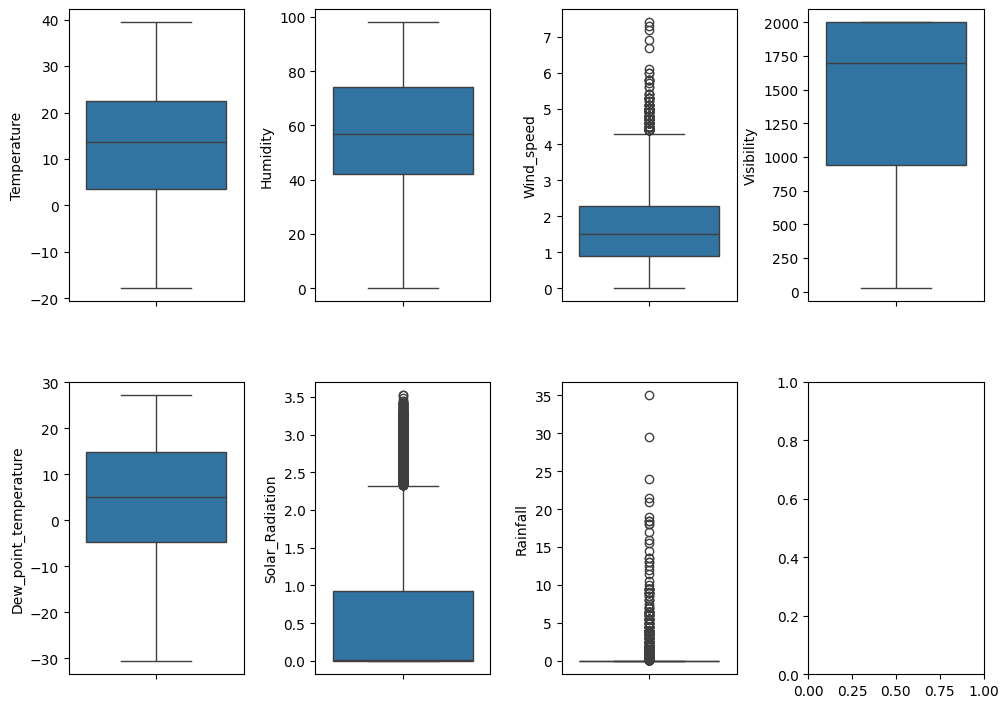

In [14]:
data_num=df.loc[:,['Temperature', 'Humidity','Wind_speed','Visibility','Dew_point_temperature','Solar_Radiation', 'Rainfall']]
fig, axs=plt.subplots(ncols=4, nrows=2, figsize=(10,7))
index=0
axs=axs.flatten()
for k, v in data_num.items():
  sns.boxplot(y=k, data=data_num, ax=axs[index])
  index+=1
plt.tight_layout(pad=0.4,w_pad=0.5, h_pad=5.0)

Comment: Wind speed, Solar Radiation, Rainfall contain outliners. Rainfall has the most outliners

## 2. Analysis of categorical variables

### - Bikes rented by month

[Text(0.5, 1.0, 'Count of Rented bikes acording to Month'),
 Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Number of bicycles rented ')]

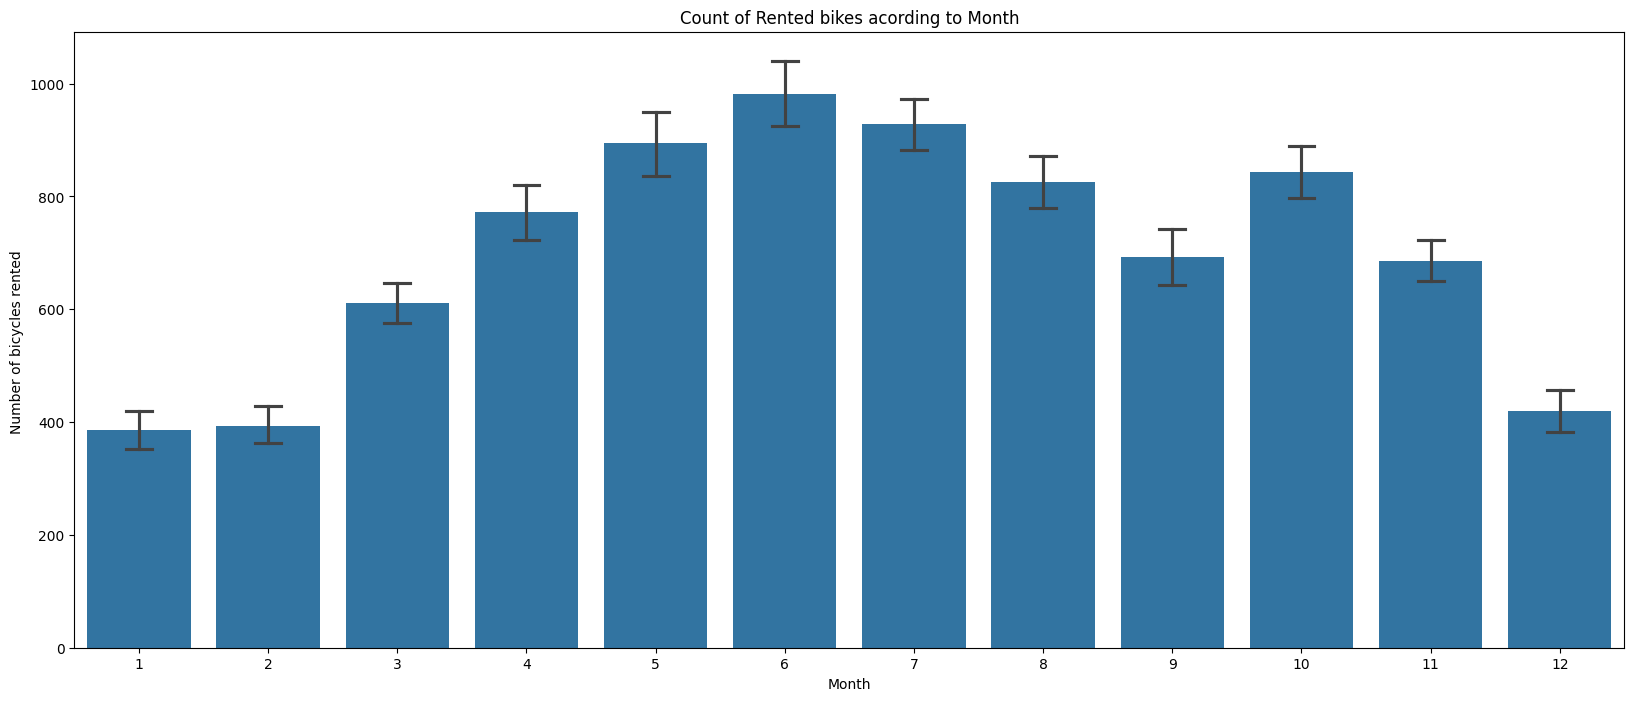

In [15]:
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=df, x= 'month', y='Rented_Bike_Count', ax=ax, capsize=.2)
ax.set(title='Count of Rented bikes acording to Month',xlabel='Month', ylabel='Number of bicycles rented ')

Comment: Demand of rented bikes is hight from April to August

### - Bikes rented by time of day

[Text(0.5, 1.0, 'Count of Rented bikes acording to Time of Day')]

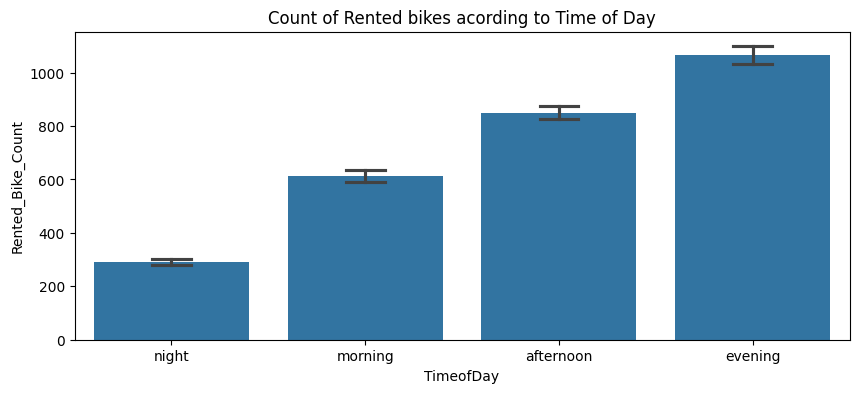

In [16]:
fig,ax=plt.subplots(figsize=(10,4))
sns.barplot(data=df,x='TimeofDay',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Time of Day')

Comment: Bikes are mostly rented in the afternoon and evening

### - Bikes rented by season

[Text(0.5, 1.0, 'Count of Rented bikes acording to Season ')]

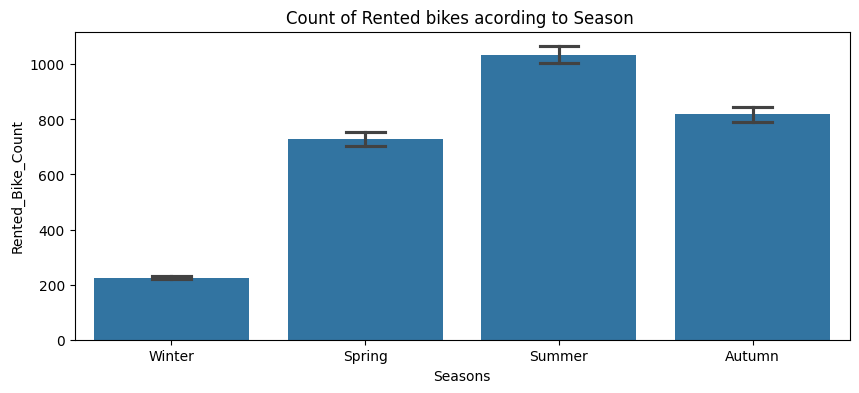

In [17]:
fig,ax=plt.subplots(figsize=(10,4))
sns.barplot(data=df, x='Seasons', y='Rented_Bike_Count', ax=ax, capsize=.2)
ax.set(title='Count of Rented bikes acording to Season ')

Comment: Most bikes are rented in summer. There is a significant difference between the number rented in Summer and Winter. Presumably, it is due to snowfall which prenents people form biking.

### - Bikes rented by holiday

[Text(0.5, 1.0, 'Number of Rented bikes acording to Holiday')]

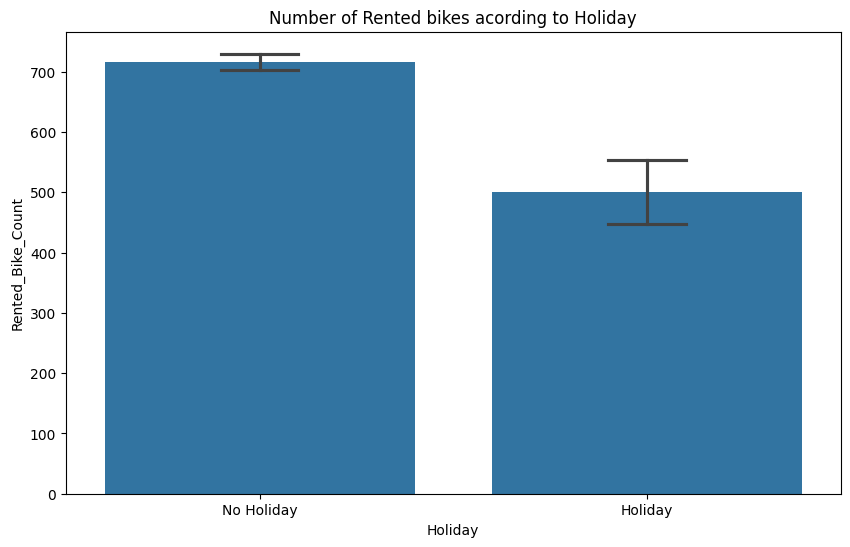

In [18]:
fig,ax=plt.subplots(figsize=(10,6))
sns.barplot(data=df, x='Holiday', y='Rented_Bike_Count', ax=ax, capsize=.2)
ax.set(title='Number of Rented bikes acording to Holiday')

Comments: The graph demonstrates that people prefer hiring bikes on normal days to holiday

### - Bikes rented by functioning day

[Text(0.5, 1.0, 'Number of Rented bikes acording to Functioning Day')]

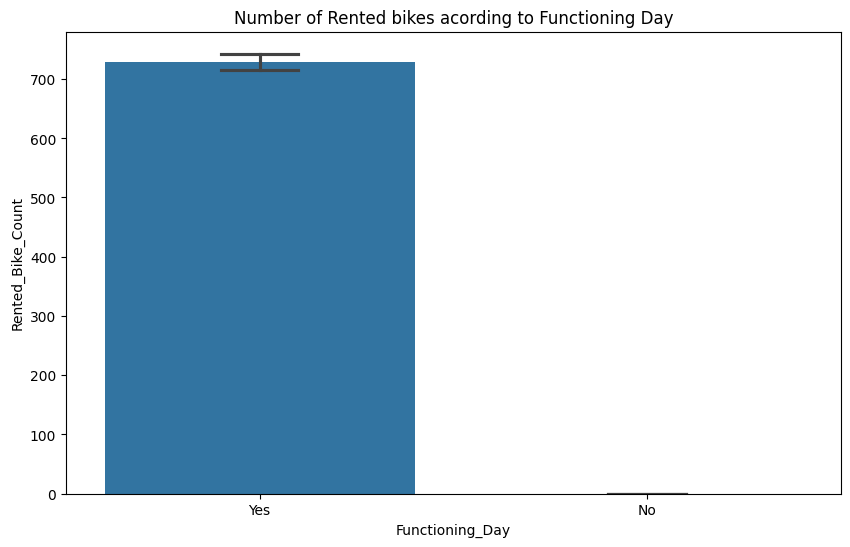

In [19]:
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(data=df, x='Functioning_Day', y='Rented_Bike_Count', ax=ax, capsize=.2)
ax.set(title='Number of Rented bikes acording to Functioning Day')

Comment: Predictably, people can only rent bikes when the renting service is operating. To make sure the model can predict accurately, we will drop all rows with Functioning_Day == No

In [61]:
# Dropping non-functioning days
df_no_fd = df.loc[df['Functioning_Day']=='No'].index
df.drop(df_no_fd, axis=0, inplace=True)
# Dropping functioning day column
df = df.drop('Functioning_Day', axis=1)

### - Bikes rented by weekday/ weekend

[Text(0.5, 1.0, 'Number of Rented bikes acording to weekdays and weekend')]

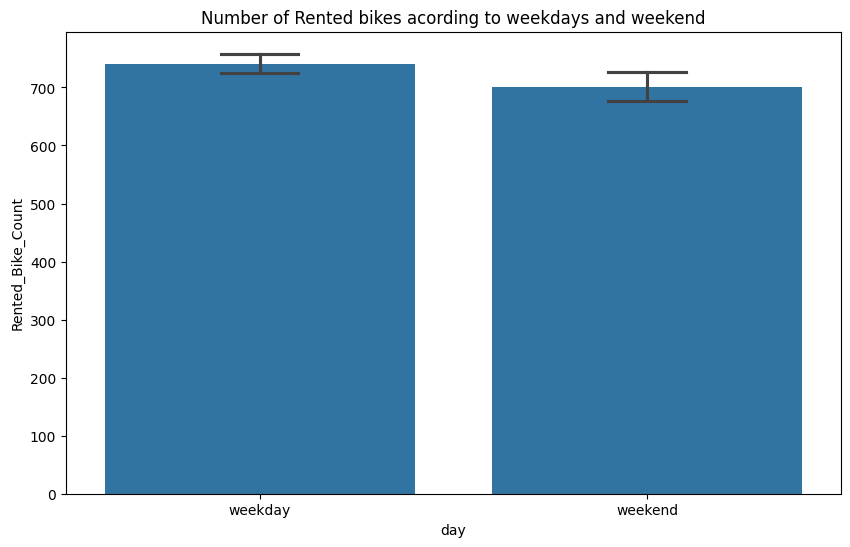

In [22]:
# Calculate the number of rented bikes on weekend and weekday
df.groupby(['day'], as_index=False)['Rented_Bike_Count'].sum()
#
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(data=df, x='day', y='Rented_Bike_Count', ax=ax, capsize=.2)
ax.set(title='Number of Rented bikes acording to weekdays and weekend')

Comment: In the above graph, the number of rented bikes on Weedays are more than that in Weekend

## 3. Analysis of numeric variables

Analyze of Numerical variables displots

In [23]:
# assign the numerical column to variable
numerical_columns=list(df.select_dtypes(['int64', 'float64']).columns)
numerical_features = pd.Index(numerical_columns)

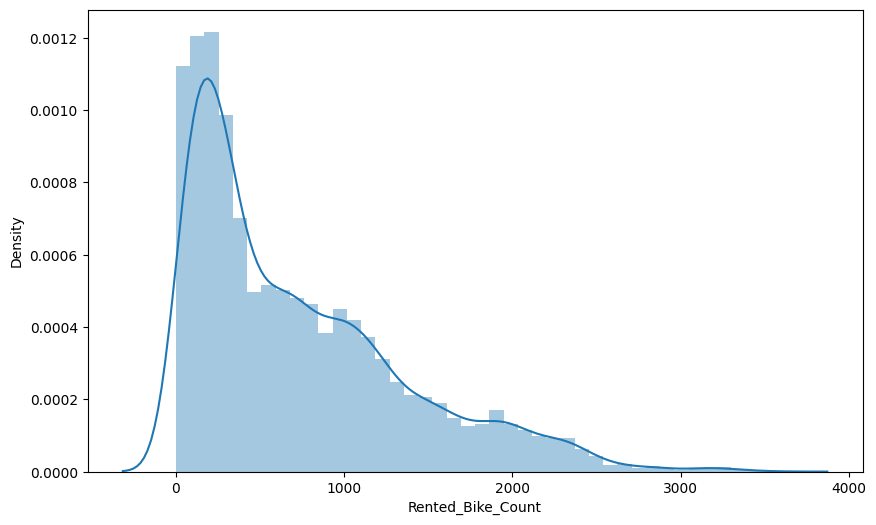

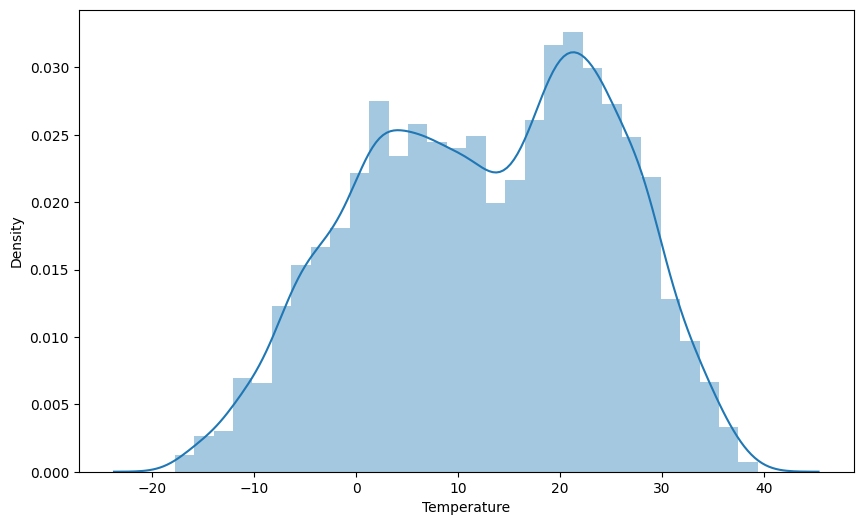

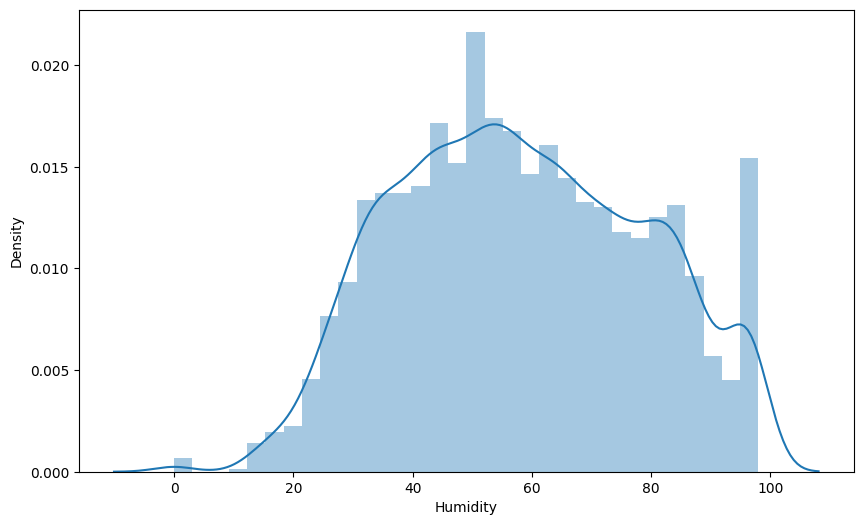

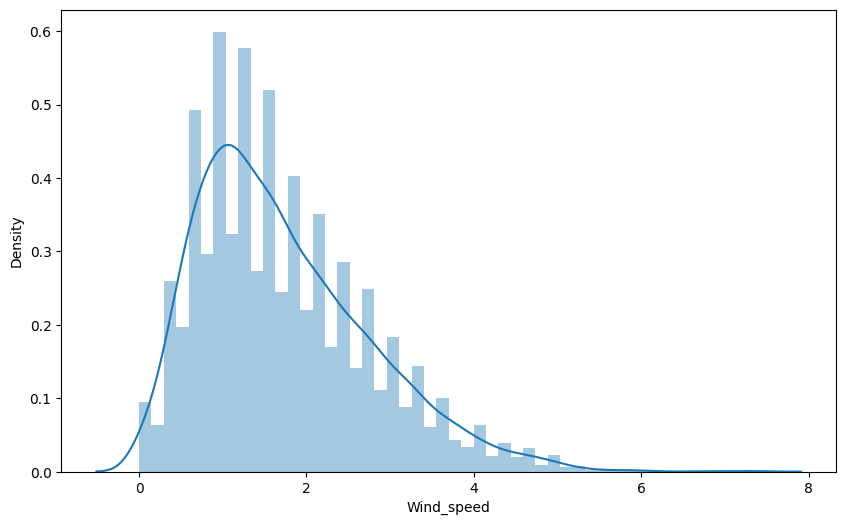

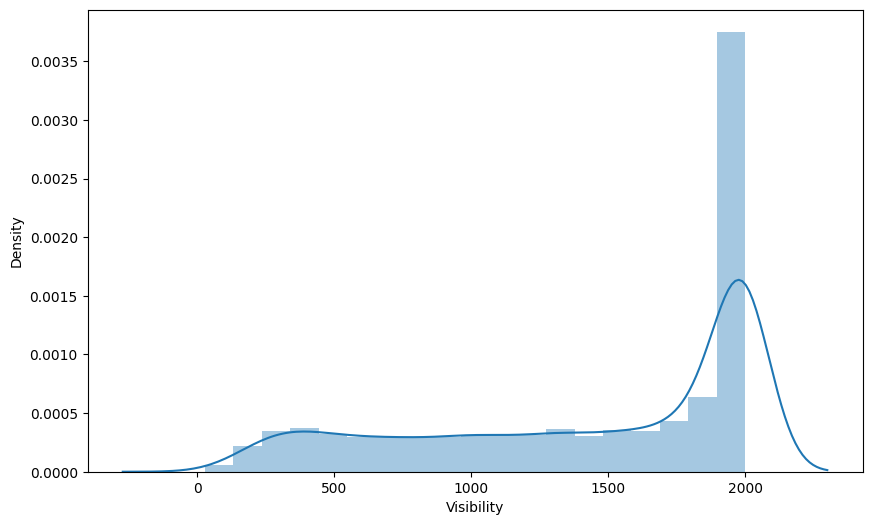

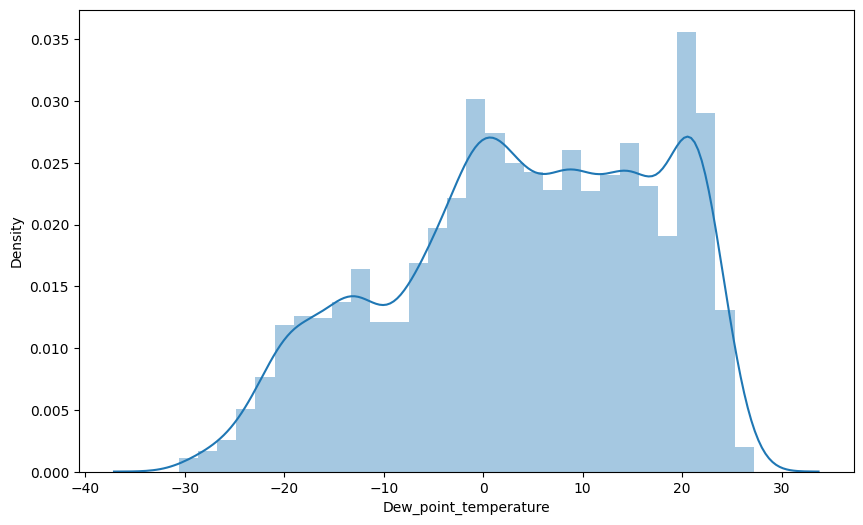

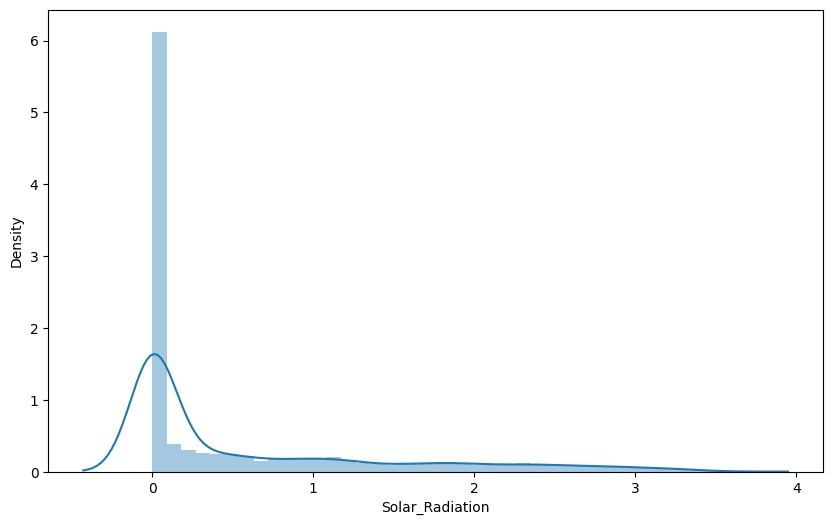

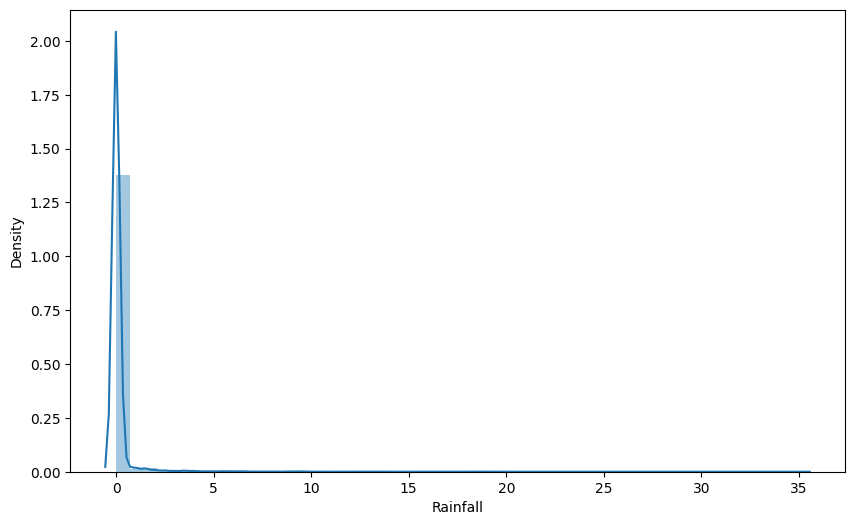

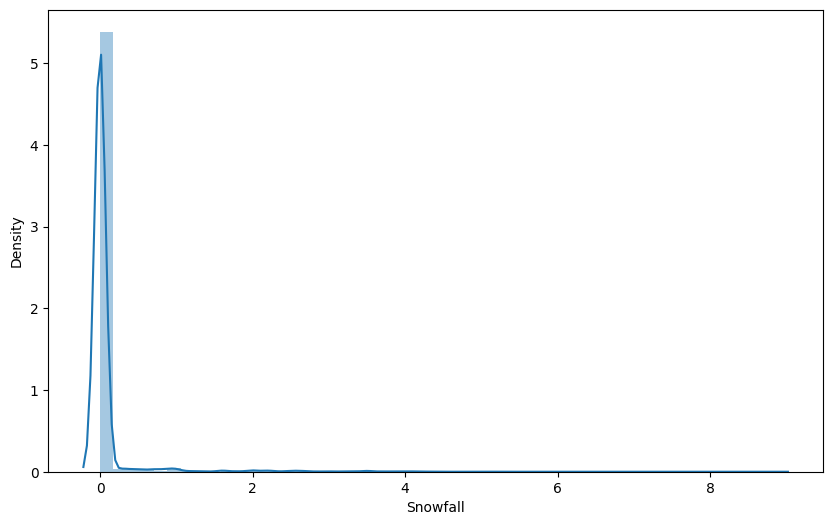

In [24]:
# printing displots to analyze the distribution of all numerical features
for col in numerical_features:
    plt.figure(figsize=(10,6))
    sns.distplot(x=df[col])
    plt.xlabel(col)
plt.show()

##### Numerical with Rented_Bike_Count

Regression plot

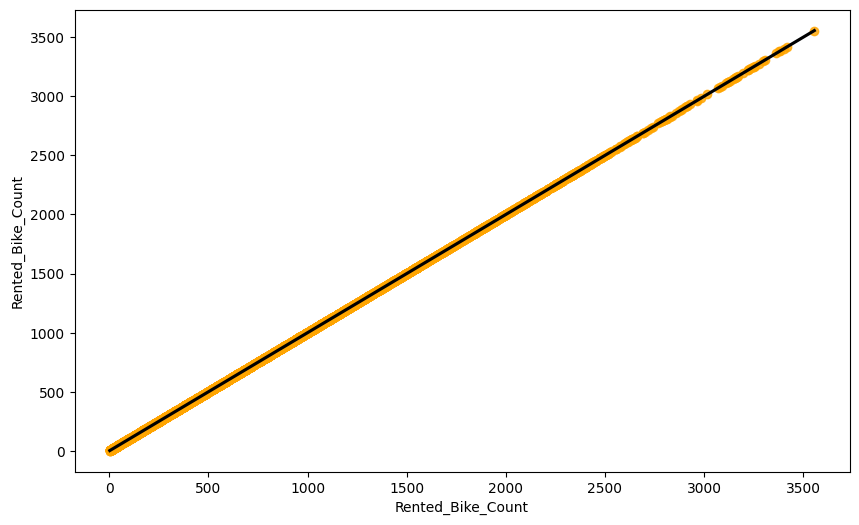

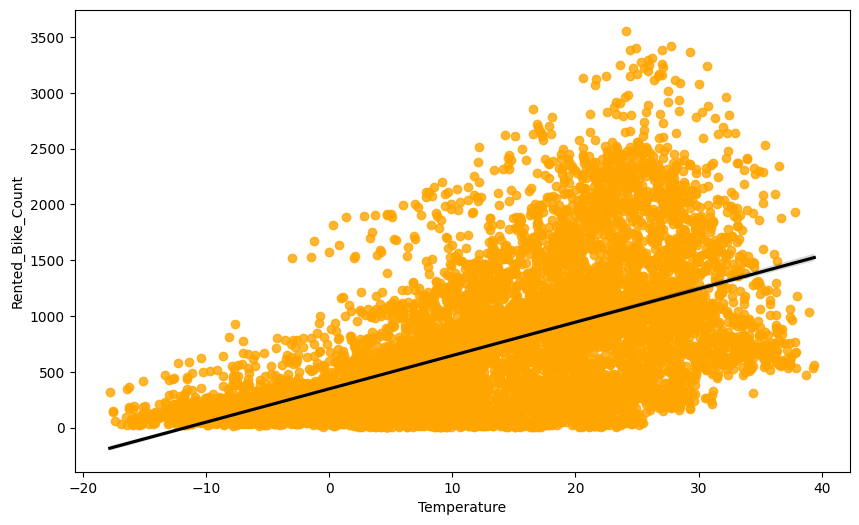

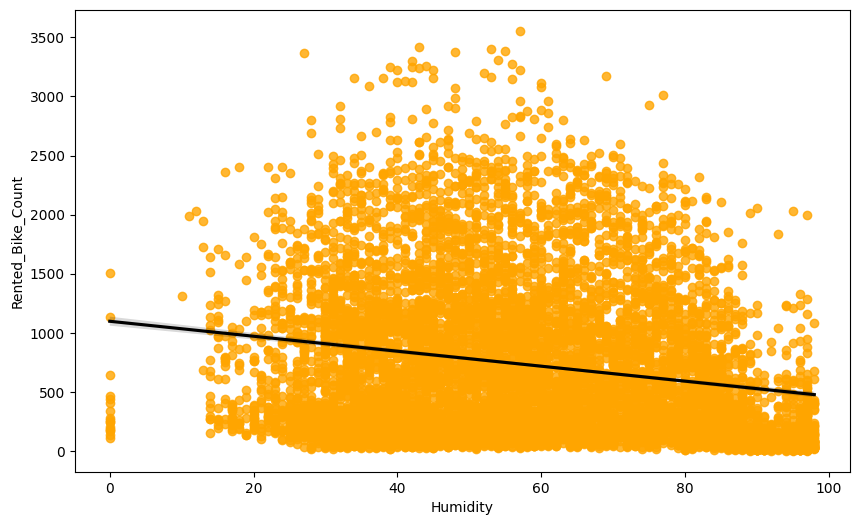

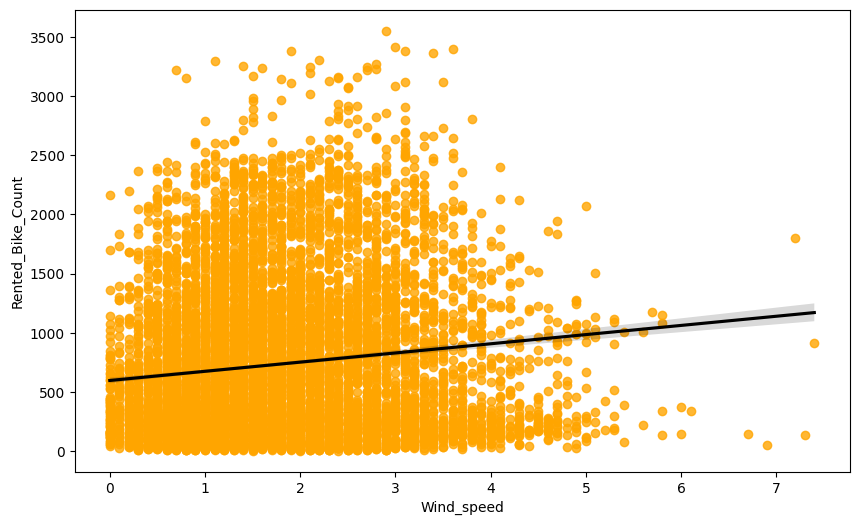

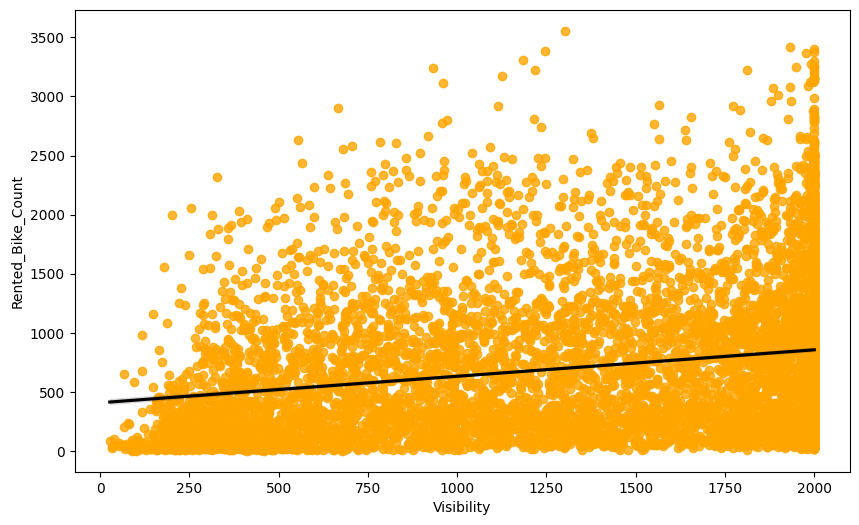

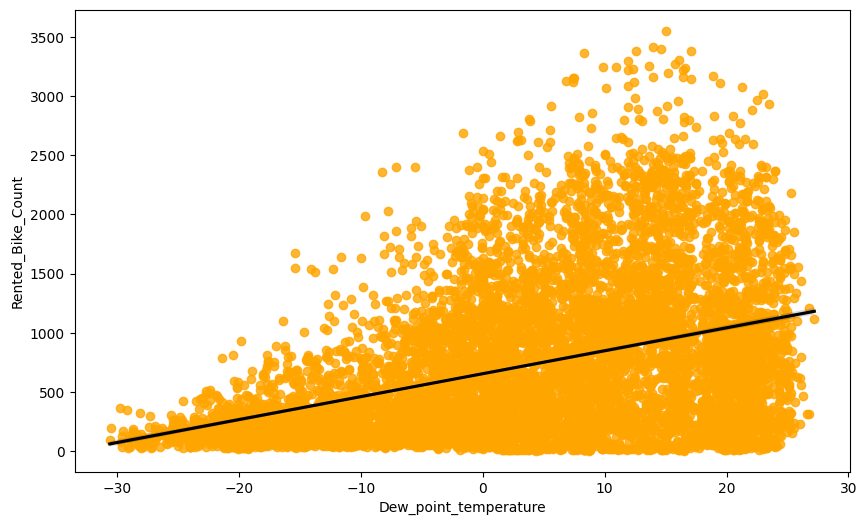

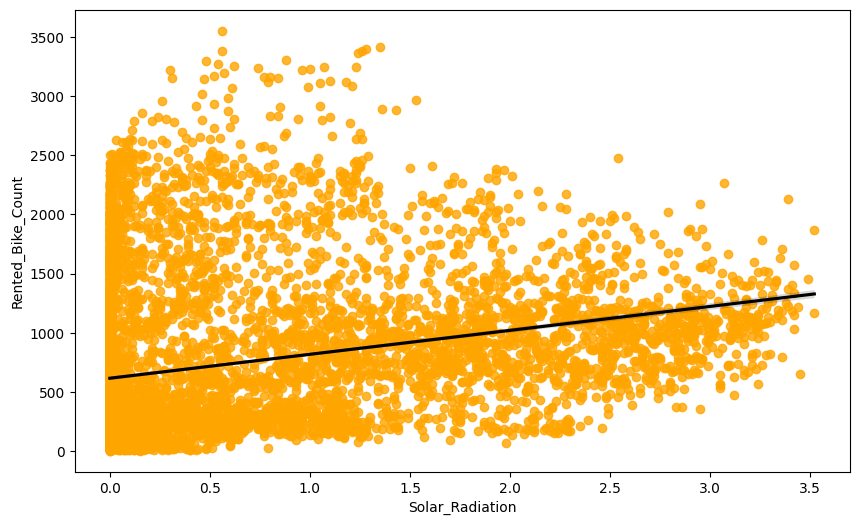

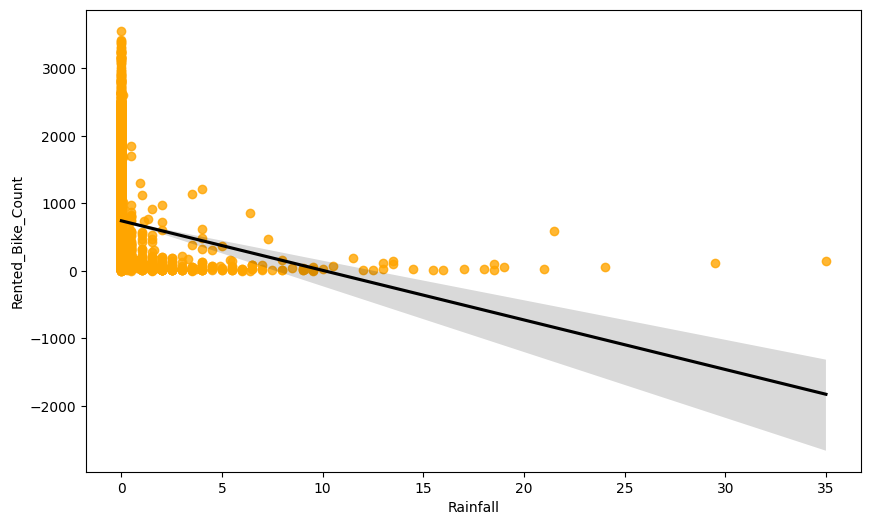

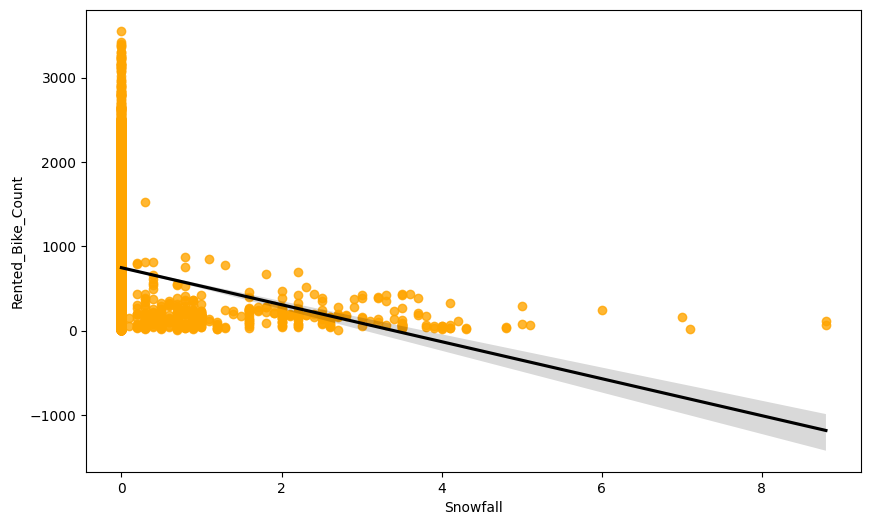

In [ ]:
# printing the regression plot for all the numbertical features
for col in numerical_features:
  fig,ax=plt.subplots(figsize=(10,6))
  sns.regplot(x=df[col], y=df['Rented_Bike_Count'], scatter_kws={'color':'orange'}, line_kws={'color':'black'})

Comment:

- From the above regression plot of all numerical features we see that the columns 'Temperature', 'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation' are positively relation to the target variable.
- Which means the rented bike count increases with increase of these features.
- 'Rainfall', 'Snowfall', 'Humidity' these features are negatively related with the target variable which means the rented bike count decreases when these features increase

Normalise Rented_Bike_Count column data

Text(0.5, 0, 'Rented_Bike_Count')

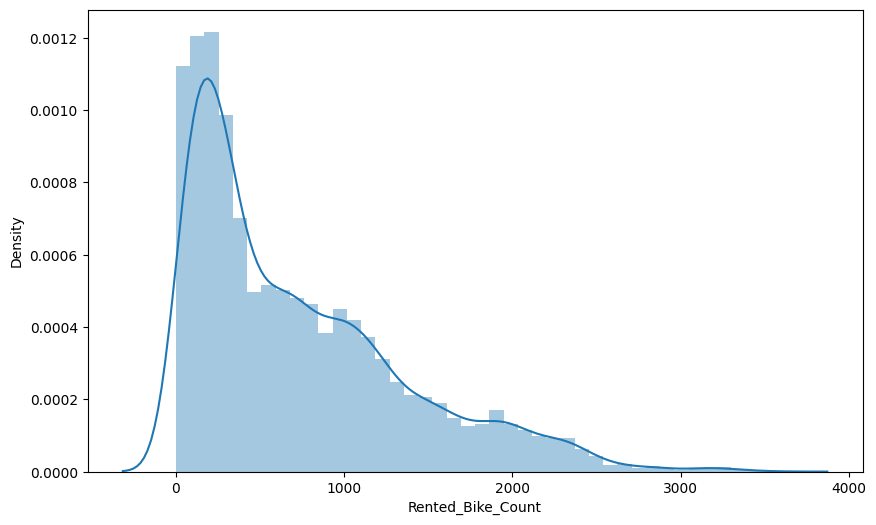

In [37]:
plt.figure(figsize=(10,6))
sns.distplot(x=df['Rented_Bike_Count'])
plt.xlabel('Rented_Bike_Count')

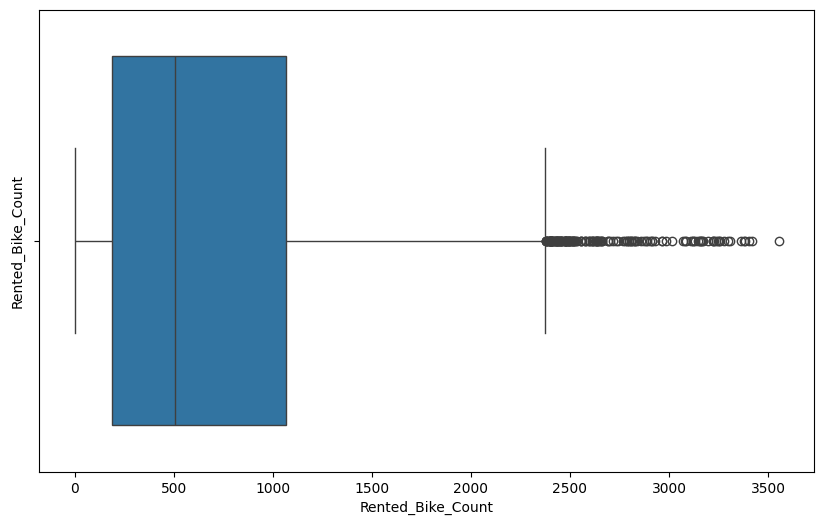

In [54]:
# Boxplot to check for outlier
plt.figure(figsize=(10,6))
plt.ylabel('Rented_Bike_Count')
sns.boxplot(x=df['Rented_Bike_Count'])
plt.show()

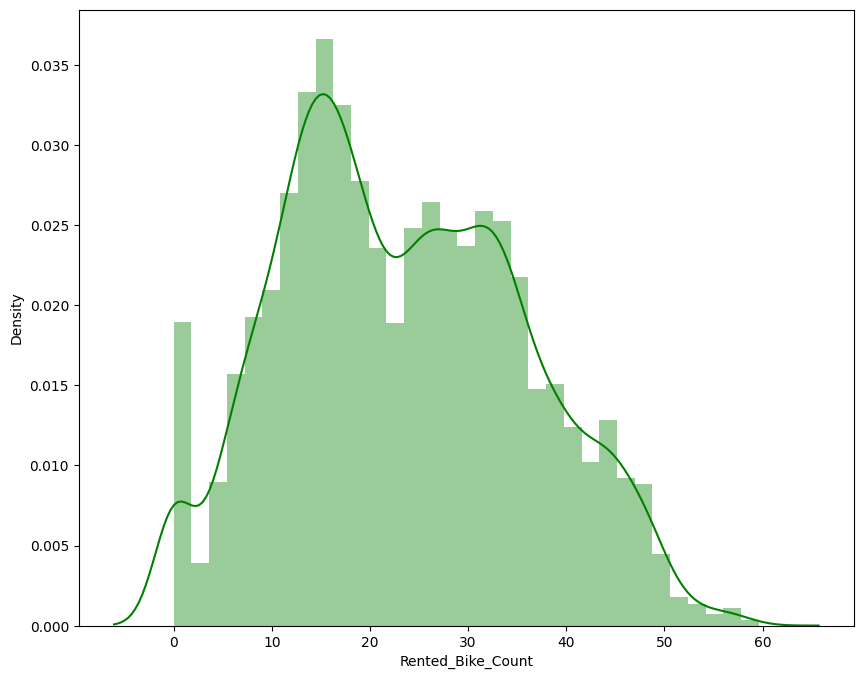

In [55]:
# Applying square root to Rented Bike Count to improve skewness
plt.figure(figsize=(10,8))
plt.xlabel('Rented_Bike_Count')
plt.ylabel('Density')

ax=sns.distplot(np.sqrt(df['Rented_Bike_Count']), color='green')

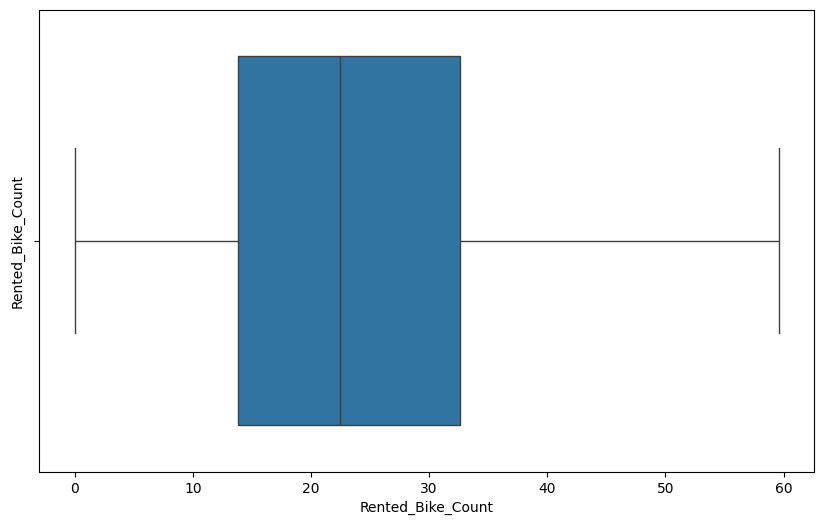

In [56]:
# After applying sqrt on Rented Bike Count check wheater we still have outliers
plt.figure(figsize=(10,6))
plt.ylabel('Rented_Bike_Count')
sns.boxplot(x=np.sqrt(df['Rented_Bike_Count']))
plt.show()

# VII. BUILDING MODEL<a name='7'><a>

## Categorical Features

In [57]:
# List all categorical columns
cate_columns = list(df.select_dtypes(['object', 'category']).columns)
cate_columns=pd.Index(cate_columns)
cate_columns

Index(['Hour', 'Seasons', 'Holiday', 'Functioning_Day', 'year', 'month', 'day',
       'weekday', 'TimeofDay'],
      dtype='object')

In [58]:
df.head()

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,year,month,day,weekday,TimeofDay
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,weekday,3,night
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,weekday,3,night
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,weekday,3,night
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,weekday,3,night
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,weekday,3,night


In [59]:
# Select some categorical features to get dummies
dummies = ['Holiday', 'TimeofDay', 'day', 'Seasons']
for col in dummies:
    data_dummy = pd.get_dummies(df[col], prefix = col, drop_first = True)
    df.pop(col)
    df = pd.concat([df, data_dummy], axis =1)
df.head()

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,...,month,weekday,Holiday_No Holiday,TimeofDay_morning,TimeofDay_afternoon,TimeofDay_evening,day_weekend,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,...,1,3,True,False,False,False,False,False,False,True
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,...,1,3,True,False,False,False,False,False,False,True
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,...,1,3,True,False,False,False,False,False,False,True
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,...,1,3,True,False,False,False,False,False,False,True
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,...,1,3,True,False,False,False,False,False,False,True


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8465 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rented_Bike_Count      8465 non-null   int64  
 1   Temperature            8465 non-null   float64
 2   Humidity               8465 non-null   int64  
 3   Wind_speed             8465 non-null   float64
 4   Visibility             8465 non-null   int64  
 5   Dew_point_temperature  8465 non-null   float64
 6   Solar_Radiation        8465 non-null   float64
 7   Rainfall               8465 non-null   float64
 8   Snowfall               8465 non-null   float64
 9   Holiday_No Holiday     8465 non-null   bool   
 10  TimeofDay_morning      8465 non-null   bool   
 11  TimeofDay_afternoon    8465 non-null   bool   
 12  TimeofDay_evening      8465 non-null   bool   
 13  day_weekend            8465 non-null   bool   
 14  Seasons_Spring         8465 non-null   bool   
 15  Seasons_S

## Split data into train/test/eval set

In [63]:
# Drop unnecessary columns
df=df.drop(['Date','Hour','year','month','weekday'], axis=1)

In [65]:
X=df.drop(['Rented_Bike_Count'], axis=1)
y=np.sqrt(df['Rented_Bike_Count'])
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=1)

## MODELS

### 1. Linear regression model

In [67]:
# Build a pipeline
pipeline = [('polynomial', PolynomialFeatures(degree=2)),
            ('model', LinearRegression())]
pipe_lr = Pipeline(pipeline)

In [68]:
MSE_linear = cross_val_score(pipe_lr, X_train, y_train, cv=4, scoring='neg_mean_squared_error')
r2_linear=cross_val_score(pipe_lr, X_train, y_train, cv=4, scoring='r2')
print(f'The mean MSE of the folds of training set={MSE_linear.mean()}+-{MSE_linear.std()}')
print(f'The mean R2 of the folds of training set={r2_linear.mean()}+-{r2_linear.std()}')

The mean MSE of the folds of training set=-31.620223345661465+-1.9133598064927615
The mean R2 of the folds of training set=0.774098888613263+-0.011372894092085018


### 2. Lasso regression model

In [69]:
#  Buid a Pipeline
pipeline = [('polynomial', PolynomialFeatures (degree=2)),
            ('model', Lasso(alpha=1.3, max_iter=2000))]
lasso_reg=Pipeline(pipeline)


In [70]:
MSE_cv_lasso = cross_val_score(lasso_reg, X_train, y_train, cv=4, scoring='neg_mean_squared_error')
r2_cv_lasso = cross_val_score(lasso_reg, X_train, y_train, cv=4, scoring='r2')
print(f'The mean MSE of the folds={MSE_cv_lasso.mean()}+-{MSE_cv_lasso.std()}')
print(f'The mean R2 of the folds={r2_cv_lasso.mean()}+-{r2_cv_lasso.std()}')

The mean MSE of the folds=-37.83399854921496+-1.5080341517410867
The mean R2 of the folds=0.7296379366209949+-0.00834755952706601


### 3. Ridge regression

In [71]:
# Build a Pipeline
pipeline=[('polynomial', PolynomialFeatures(degree=2)),
          ('model', Ridge(alpha=1.3, max_iter=2000))]
ridge = Pipeline(pipeline)

In [72]:
MSE_cv_ridge = cross_val_score(ridge, X_train, y_train, cv=4, scoring='neg_mean_squared_error')
r2_cv_ridge = cross_val_score(ridge, X_train, y_train, cv=4, scoring='r2')
print(f'The mean MSE of the folds = {MSE_cv_ridge.mean()}+-{MSE_cv_ridge.std()}')
print(f'The mean R2 of the folds={r2_cv_ridge.std()}')

The mean MSE of the folds = -31.605362851452043+-1.706791150417494
The mean R2 of the folds=0.009813307350823794


### 4. Decision tree regression

In [73]:
#Build a Pipeline
pipeline = [('polynomial', PolynomialFeatures(degree = 2)),
         ('model',DecisionTreeRegressor(criterion='squared_error', max_depth=8,
                      max_features=9, max_leaf_nodes=100,))]
decision_regressor = Pipeline(pipeline)

In [74]:
MSE_cv_Des_tree = cross_val_score(decision_regressor, X_train, y_train, cv=4, scoring='neg_mean_squared_error')
r2_cv_Des_tree = cross_val_score(decision_regressor, X_train, y_train, cv=4, scoring='r2')
print(f"The mean MSE of the folds = {MSE_cv_Des_tree.mean()} +- {MSE_cv_Des_tree.std()}")
print(f"The mean R2 of the folds = {r2_cv_Des_tree.mean()} +- {r2_cv_Des_tree.std()}")

The mean MSE of the folds = -37.14012827366012 +- 2.421811721338491
The mean R2 of the folds = 0.7318896248634359 +- 0.019790750696691777


### 5. Random Forest Regression

In [75]:
#Build a Pipeline
pipeline = [('polynomial', PolynomialFeatures(degree = 2)),
         ('model',RandomForestRegressor())]
rf = Pipeline(pipeline)

In [76]:
mse_cv_rfr = cross_val_score(rf, X_train, y_train, cv=4, scoring='neg_mean_squared_error')
r2_cv_rfr = cross_val_score(rf, X_train, y_train, cv=4, scoring='r2')
print(f"The mean MSE of the folds = {mse_cv_rfr.mean()} +- {mse_cv_rfr.std()}")
print(f"The mean R2 of the folds = {r2_cv_rfr.mean()} +- {r2_cv_rfr.std()}")

The mean MSE of the folds = -24.13877075746899 +- 1.418216905312721
The mean R2 of the folds = 0.8277917525200705 +- 0.00663417499261468


#### Model Comparision

In [77]:
df_compare = pd.DataFrame(
    {"mse": [MSE_linear.mean(),MSE_cv_lasso.mean(),MSE_cv_ridge.mean(),MSE_cv_Des_tree.mean(),mse_cv_rfr.mean()],
   "r2": [r2_linear.mean(),r2_cv_lasso.mean(),r2_cv_ridge.mean(),r2_cv_Des_tree.mean(),r2_cv_rfr.mean()]})
new_index = ['Linear Regression', 'Lasso Regression','Ridge Regression','Decision Tree Regression','Random Forest Regression']
df_compare.index = new_index
df_compare

,mse,r2
Linear Regression,-31.620223,0.774099
Lasso Regression,-37.833999,0.729638
Ridge Regression,-31.605363,0.774193
Decision Tree Regression,-37.140128,0.731890
Random Forest Regression,-24.138771,0.827792


=> Random Forest returns the best réult, we will select this model for tuning

Model Tuning

In [80]:
params = {'n_estimators': np.arange(100, 1000, 100)}
pipeline = [('polynomial', PolynomialFeatures(degree = 2)),
         ('model',GridSearchCV(RandomForestRegressor(), params, scoring='r2', cv=4, verbose=1))]
grid = Pipeline(pipeline)

In [ ]:
grid.fit(X_train, y_train)
print(f"{grid.best_score_} with {grid.best_params_}")

Fitting 4 folds for each of 9 candidates, totalling 36 fits


# VIII. CONCLUSION<a name='8'><a>

During the time of our analysis, we initially did EDA on all the features of our datset. We first analysed our dependent variable, 'Rented Bike Count' and also transformed it. Next we analysed categorical variable and dropped the variable who had majority of one class, we also analysed numerical variable, found out the correlation, distribution and their relationship with the dependent variable. We also removed some numerical features who had mostly 0 values and hot encoded the categorical variables.

Next we implemented 5 machine learning algorithms Linear Regression, Lasso, Ridge, Decission tree regression, and Random Forest. We did Plunomial tuning to improve our model performance.

However, this is not the ultimate end. As this data is time dependent, the values for variables like temperature, windspeed, solar radiation etc., will not always be consistent. Therefore, there will be scenarios where the model might not perform well. As Machine learning is an exponentially evolving field, we will have to be prepared for all contingencies and also keep checking our model from time to time. Therefore, having a quality knowledge and keeping pace with the ever evolving ML field would surely help one to stay a step ahead in future.

# IX. EMPIRICAL IMPLICATIONS<a name='9'><a>

Based on the given features of the bike sharing service, which are as following:
1. **Seasonal Pricing**: Implement seasonal pricing with higher rates during the peak months of May to October when the demand for rented bikes is higher. Adjust the pricing structure to encourage more rentals during the off-peak months.
2. **Time-Specific Promotions:** Focus your marketing efforts on promoting afternoon and evening rentals. Offer time-limited discounts or incentives to attract customers during these periods. Collaborate with local businesses, such as restaurants or tourist attractions, to create joint promotions that encourage bike rentals during specific times of the day.
3. **Summer Campaigns**: Launch targeted marketing campaigns during the summer months to capitalize on the peak demand. Highlight the benefits of cycling in the summer, such as enjoying the weather, exploring outdoor destinations, and staying active.
4. **Customized Holiday Packages**: While customers prefer normal days for rentals, create customized holiday packages to cater to those who specifically seek bike rentals during holiday periods. Offer unique experiences, guided tours, or special discounts during holidays to attract customers who are looking for leisure activities.
5.**Weather-Based Dynamic Pricing:** Utilize weather data to implement dynamic pricing strategies. When the temperature, humidity, and wind speed fall within the preferred ranges (0-25 degrees, 30-80% humidity, wind speed of 1-3 or 7), offer discounted rates or promotional codes to encourage rentals. This approach can help optimize bike availability during ideal weather conditions.
6. **Weather-Focused Advertising:** Leverage weather forecasts and visibility conditions to plan targeted advertising campaigns. When the weather conditions are favorable (e.g., clear visibility, no heavy snowfall), increase your marketing efforts to remind potential customers of the benefits of renting bikes during pleasant weather.
7. **Partnerships with Weather Services:** Establish partnerships with local weather services or apps to provide real-time weather updates to your customers. Incorporate weather information into your bike rental app or website to offer personalized recommendations based on current weather conditions.
8. **Expansion and Inventory Management**: Analyze historical data and predict demand patterns to optimize bike availability. Increase the fleet size during the peak summer months to meet the higher demand. Use data-driven insights to strategically distribute bikes across different locations based on historical usage patterns.
9. **Customer Feedback and Loyalty Programs:** Continuously collect feedback from customers to understand their preferences and expectations. Implement loyalty programs that reward frequent users with exclusive benefits, discounts, or early access to bike rentals during peak seasons.
10. Community Engagement: Foster a sense of community around your bike sharing service. Organize group rides, cycling events, or charity rides during the peak months to engage with customers and promote your service.
